# Inelastic Scattering for Ar Pre-Plated MCM-41 Nanopores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from dgutils import colors as colortools
import dgutils
import spens

import matplotlib as mpl
import matplotlib.colors as mplcolors
import importlib

from heprops import helium

import pickle,os

# Notebook display options
%config InlineBackend.figure_format = 'svg'

# plot style
plot_style = {'sans':'../include/sans.mplstyle', 'notebook':'../include/notebook.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['notebook'])

figsize = plt.rcParams['figure.figsize']

π = np.pi
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
import poreutils as pore
importlib.reload(pore)

from poreutils import red,orange,green,lblue,blue,dblue,purple
from poreutils import pore_colors,pore_labels,font_path

## Load the Neutron Scattering Data

In [3]:
# load the Neutron Scattering data
Q,E,S,ΔS = spens.load_file('../data/SQW_2p5A_25-22_sf975.spe')

# we mask the low-energy scattering that is influenced by the elastic spill-over.
idx = np.where(E<0.5)[0]
S[:,idx] = 100

# create meshes for plotting
Enew = np.zeros(69)
Enew[1:] = np.copy(E)
Enew[0] = np.min(E)-(E[5]-E[4])
Qnew = np.zeros(49)
Qnew[1:] = np.copy(Q)
Qnew[0] = np.min(Q)-(Q[5]-Q[4])
Emesh,Qmesh = np.meshgrid(E,Q)

## Load the Bulk Helium and 1D threshold

### The predicted threshold for hard rods

\begin{equation}
\omega_{\pm}(q) = \frac{4}{K_L} \left \lvert \frac{q}{2q_{\rm F}} \pm \left(\frac{q}{2q_{\rm F}}\right)^2\right \rvert
\end{equation}

In [4]:
_Q = np.linspace(0.0,4.0,10000)
ϵ = helium.helium_dispersion_svp(_Q)*0.0862 # convert from K to meV

# these values have been extracted from an external analysis
KL = 1.18
kF = 0.8

# get the theoretical value for the threshold energy
_ω = pore.ω_LL(-1,_Q,KL,kF)

### Experiment with different colormaps

In [5]:
cptfile = '../include/GMT_haxby.cpt'

palette = pore.get_masked_palette(cptfile)

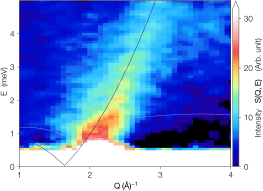

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.colors as mpl_colors

    
plt.style.reload_library()
with plt.style.context(plot_style['sans']):
    figsize=plt.rcParams['figure.figsize']    
    dgutils.fonts.set_custom_font(pore.font_path)

    fig,ax = plt.subplots(1,1,figsize=(figsize[0],0.8*figsize[0]),constrained_layout=True, dpi=300)

    # nipy_spectral is also good
    pcm = ax.pcolormesh(Qmesh-0*(Q[5]-Q[4]),Emesh,S, edgecolor='None', rasterized=True, shading='auto', 
                        norm=mpl_colors.Normalize(vmin=0.0, vmax=32),cmap=palette, snap=True)
    #pcm = ax.imshow(S.T, rasterized=True, interpolation='lanczos', origin='lower',
    #                    extent=[np.min(Q),np.max(Q),np.min(E),np.max(E)],cmap=palette, vmin=0, vmax=30, aspect='auto')

    ax.plot(_Q,ϵ, color='#CCCCCC', ls='--')
    ax.plot(_Q+(Q[5]-Q[4])/2,_ω+(E[5]-E[4])/2, color=purple, ls='-')

    ax.set_xlabel(r'$\;Q\; (\mathrm{\AA})^{-1}$')
    ax.set_ylabel(r'  E  (meV)')
    ax.set_ylim(0,4.99)
    ax.set_xlim(1.0,4)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.025)

    plt.colorbar(pcm, cax=cax, label=r'Intensity $\;\;S(Q,E)\;\;$  (Arb. unit)',  extend='max')
    plt.savefig('../figures/SQE.pdf', dpi=600)

## Plot the theoretical scattering

Text(0.5, 0, 'Wavevector $q\\ [\\mathrm{Å^{-1}}]$')

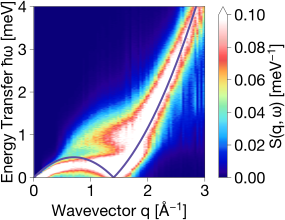

In [7]:
data_1d = np.load("../data/1D-helium_T1.6_N28_L200.0.npz")
dsf=data_1d["dsf"]
extent=data_1d["extent"]

vmax=0.1
#vmax=None

aspect = (extent[1] - extent[0])/(4);
aspect = 3.0/4.0;
#aspect = plt.rcParams['figure.figsize'][1]/plt.rcParams['figure.figsize'][0]/1.1

fig, ax = plt.subplots(figsize=(4,4*0.78), dpi=240, constrained_layout=True)
im = ax.imshow(dsf,origin="lower",extent=extent,aspect=aspect,interpolation="None",vmax=vmax, cmap=palette)
ax.set_ylim(0,4)
ax.plot(_Q,pore.ω_LL(-1,_Q,2.1,0.7))
ax.set_xlim(0,3)
cb = fig.colorbar(im,
                  label="$S(q,\omega)\\  \\mathrm{[meV^{-1}]}$",
                  extend="max")
ax.set_ylabel("Energy Transfer $\\hbar\\omega\\ \\mathrm{[meV]}$",
              fontweight="regular")
ax.set_xlabel("Wavevector $q\\ [\\mathrm{Å^{-1}}]$",
              fontweight="regular")

## Plot the Combined Figure

### Horizontal

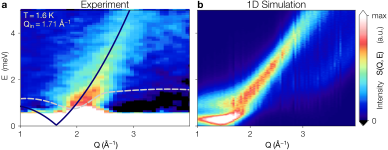

In [27]:
with plt.style.context(plot_style['sans']):
    figsize = plt.rcParams['figure.figsize']
    dgutils.fonts.set_custom_font(font_path)
    fig,ax = plt.subplots(nrows=1,ncols=2, sharey=True,figsize=(1.75*figsize[0],1*figsize[1]), constrained_layout=False)
    fig.subplots_adjust(wspace=0.01)


    #fig = plt.figure(figsize=(1.5*figsize[0],1*figsize[1]), constrained_layout=True)
    #exp_fig,theory_fig = fig.subfigures(nrows=1,ncols=2)
    
    #ax = plt.subplots(1,2, sharey=True, sharex=True)## gridspec_kw={"left":0.05})
    ax_exp,ax_theory = ax
    #ax_theory = theory_fig.subplots(1,1)
    
    # experimental plot
    pcm = ax_exp.pcolormesh(Qmesh-0*(Q[5]-Q[4]),Emesh,S, edgecolor='None', rasterized=True, shading='auto', 
                        norm=mpl_colors.Normalize(vmin=0.0, vmax=32),cmap=palette, snap=True)
    
    ax_exp.plot(_Q,ϵ, color='#CCCCCC', ls='--', lw=1.5)
    ax_exp.plot(_Q+(Q[5]-Q[4])/2,_ω+(E[5]-E[4])/2, color=purple, ls='-', lw=1.5)

    ax_exp.set_xlabel(r'$\;Q\; (\mathrm{\AA}^{-1})$')
    ax_exp.set_ylabel(r'  E  (meV)')
    ax_exp.set_ylim(0,4.99)
    ax_exp.set_xlim(1.0,3.99)
    
    path_eff = [path_effects.withSimplePatchShadow(offset=(0.06, -0.06), shadow_rgbFace='k', alpha=1.0)]
    
    cT = 1.6
    cQ = 1.71
    ax_exp.text(0.02,0.98,f'$T = {cT:3.1f}\; \mathrm{{K}}$', ha='left',va='top', color='w',
                      transform=ax_exp.transAxes, fontsize=8, path_effects=path_eff)
    label = r'$Q_{\rm in} = $' + f'{cQ:4.2f} ' +r'$\mathrm{\AA}^{-1}$'
    ax_exp.text(0.02,0.92,label, ha='left',va='top', transform=ax_exp.transAxes, color='w',
                              fontsize=8,path_effects=path_eff)
    
    # Theory Plot
    im = ax_theory.imshow(dsf,origin="lower",extent=extent,aspect=0.44,interpolation="None",vmax=0.18, cmap=palette)
    ax_theory.set_xlim(1,3.99)
    ax_theory.set_ylim(0,4.99)
    ax_theory.set_xlabel(r'$\;Q\; (\mathrm{\AA}^{-1})$')
    #ax_theory.plot(_Q,pore.ω_LL(-1,_Q,2.1,0.68),color=purple, ls='-', lw=1.5)
    
    # Add plot labels
    ax_exp.text(0.5,1.02,'Experiment', ha='center',transform=ax_exp.transAxes)
    ax_theory.text(0.5,1.02,'1D Simulation', ha='center',transform=ax_theory.transAxes)
    
    ## add a colorbar

    sm = plt.cm.ScalarMappable(cmap=palette, norm=mpl_colors.Normalize(vmin=0, vmax=vmax))
    sm._A = []
    
    loc = 'right'
    vshift = 0.00
    axins1 = inset_axes(ax_theory,
                    width="5%",  
                    height="100%", 
                    loc=loc,
                    bbox_to_anchor=(0.075, vshift, 1, 1),
                    bbox_transform=ax_theory.transAxes,
                    borderpad=0)
  
    cb = fig.colorbar(sm, cax=axins1, orientation='vertical', ticks=[0,vmax], extend='both')
    cb.set_label(r'Intensity $\;\;S(Q,E)\;\;$  (a.u.)',labelpad=-10)
    cb.ax.xaxis.set_tick_params(pad=2)
    cb.ax.set_yticklabels(['0', 'max'])
    
    # panel labels
    font_props = dgutils.fonts.get_custom_font_props(pore.bold_font_path)
    ax_exp.text(-0.11,1.08,'a', ha='left',va='top', transform=ax_exp.transAxes, font=font_props)
    ax_theory.text(-0.0,1.08,'b', ha='left',va='top', transform=ax_theory.transAxes, font=font_props)
    
    #ax_theory.plot(_Q+(Q[5]-Q[4])/2,_ω+(E[5]-E[4])/2, color=purple, ls='-', lw=1.5)

    plt.savefig('../figures/SQE_exp_theory.pdf', dpi=600)
    

### Vertical

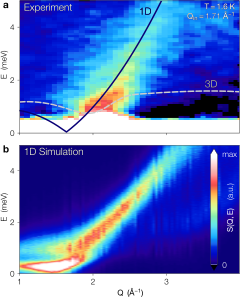

In [16]:
with plt.style.context(plot_style['sans']):
    figsize = plt.rcParams['figure.figsize']
    dgutils.fonts.set_custom_font(font_path)
    fig,ax = plt.subplots(nrows=2,ncols=1, sharey=True, sharex=True, figsize=(figsize[0],2*figsize[1]), constrained_layout=True)
    #fig.subplots_adjust(wspace=0.01)

    
    #ax = plt.subplots(1,2, sharey=True, sharex=True)## gridspec_kw={"left":0.05})
    ax_exp,ax_theory = ax
    #ax_theory = theory_fig.subplots(1,1)
    
    # experimental plot
    pcm = ax_exp.pcolormesh(Qmesh-0*(Q[5]-Q[4]),Emesh,S, edgecolor='None', rasterized=True, shading='auto', 
                        norm=mpl_colors.Normalize(vmin=0.0, vmax=32),cmap=palette, snap=True)
    
    ax_exp.plot(_Q,ϵ, color='#CCCCCC', ls='--', lw=1.5)
    ax_exp.plot(_Q+(Q[5]-Q[4])/2,_ω+(E[5]-E[4])/2, color=purple, ls='-', lw=1.5)

    #ax_exp.set_xlabel(r'$\;Q\; (\mathrm{\AA}^{-1})$')
    ax_exp.set_ylabel(r'  E  (meV)')
    ax_exp.set_ylim(0,4.99)
    ax_exp.set_xlim(1.0,3.99)
    
    path_eff = [path_effects.withSimplePatchShadow(offset=(0.06, -0.06), shadow_rgbFace='k', alpha=1.0)]
    
    cT = 1.6
    cQ = 1.71
    ax_exp.text(0.98,0.98,f'$T = {cT:3.1f}\; \mathrm{{K}}$', ha='right',va='top', color='w',
                      transform=ax_exp.transAxes, fontsize=8, path_effects=path_eff)
    label = r'$Q_{\rm in} = $' + f'{cQ:4.2f} ' +r'$\mathrm{\AA}^{-1}$'
    ax_exp.text(0.98,0.92,label, ha='right',va='top', transform=ax_exp.transAxes, color='w',
                              fontsize=8,path_effects=path_eff)
    
    ax_exp.text(0.9,0.4,'3D', ha='right',va='top', transform=ax_exp.transAxes, color='#CCCCCC',
                path_effects=path_eff)
    
    ax_exp.text(0.6,0.95,'1D', ha='right',va='top', transform=ax_exp.transAxes, color=purple,
                path_effects=path_eff)
    
    
    
    # Theory Plot
    im = ax_theory.imshow(dsf,origin="lower",aspect=0.35,extent=extent,interpolation="None",vmax=0.18, cmap=palette)
    ax_theory.set_xlim(1,3.99)
    ax_theory.set_ylim(0,4.99)
    ax_theory.set_xlabel(r'$\;Q\;\; (\mathrm{\AA}^{-1})$')
    ax_theory.set_ylabel(r'  E  (meV)')


    # Add plot labels
    ax_exp.text(0.02,0.98,'Experiment', ha='left',va='top',transform=ax_exp.transAxes,
               path_effects=path_eff, color='w')
    ax_theory.text(0.02,0.98,'1D Simulation', ha='left',va='top',transform=ax_theory.transAxes, 
                   path_effects=path_eff, color='w')
    
    ## add a colorbar

    sm = plt.cm.ScalarMappable(cmap=palette, norm=mpl_colors.Normalize(vmin=0, vmax=vmax))
    sm._A = []
    
    loc = 'right'
    vshift = 0.00
    axins1 = inset_axes(ax_theory,
                    width="3%",  
                    height="95%", 
                    loc=loc,
                    bbox_to_anchor=(-0.1, vshift, 1, 1),
                    bbox_transform=ax_theory.transAxes,
                    borderpad=0)
  
    cb = fig.colorbar(sm, cax=axins1, orientation='vertical', ticks=[0,vmax], extend='both')
    cb.set_label(r'$\;\;S(Q,E)\;\;$  (a.u.)',labelpad=-10, color='w')
    cb.ax.xaxis.set_tick_params(pad=0)
    cb.ax.set_yticklabels(['0', 'max'], color='w')
    
    # panel labels
    font_props = dgutils.fonts.get_custom_font_props(pore.bold_font_path)
    ax_exp.text(-0.075,1.0,'a', ha='left',va='top', transform=ax_exp.transAxes, font=font_props)
    ax_theory.text(-0.075,1.0,'b', ha='left',va='top', transform=ax_theory.transAxes, font=font_props)
    
    plt.savefig('../figures/SQE_exp_theory_vert.pdf', dpi=600)
    plt.savefig('../figures/SQE_exp_theory_vert.svg')
